### 1. Data Knowledge

#### Data dictonary
       Loan_ID : A unique id for the loan.
       Loan_Amount_Requested : The listed amount of the loan applied for by the borrower.
       Length_Employed : Employment length in years
       Home_Owner : The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.
       Annual_Income : The annual income provided by the borrower during registration.
       Income_Verified : Indicates if income was verified, not verified, or if the income source was verified
       Purpose_Of_Loan : A category provided by the borrower for the loan request. 
       Debt_To_Income : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
       Inquiries_Last_6Mo : The number of inquiries by creditors during the past 6 months.
       Months_Since_Deliquency : The number of months since the borrower's last delinquency.
       Number_Open_Accounts : The number of open credit lines in the borrower's credit file.
       Total_Accounts : The total number of credit lines currently in the borrower's credit file
       Gender : Gender
       Interest_Rate : Target Variable: Interest Rate category (1/2/3) of the loan application

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Input

In [2]:
loan_df = pd.read_csv('train_fNxu4vz.csv')

In [3]:
## Getting the first 5 rows
loan_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
## Shape of the training data
loan_df.shape

(164309, 14)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
Loan_ID                    164309 non-null int64
Loan_Amount_Requested      164309 non-null object
Length_Employed            156938 non-null object
Home_Owner                 138960 non-null object
Annual_Income              139207 non-null float64
Income_Verified            164309 non-null object
Purpose_Of_Loan            164309 non-null object
Debt_To_Income             164309 non-null float64
Inquiries_Last_6Mo         164309 non-null int64
Months_Since_Deliquency    75930 non-null float64
Number_Open_Accounts       164309 non-null int64
Total_Accounts             164309 non-null int64
Gender                     164309 non-null object
Interest_Rate              164309 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 17.6+ MB


In [6]:
loan_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

#### Imputing null values

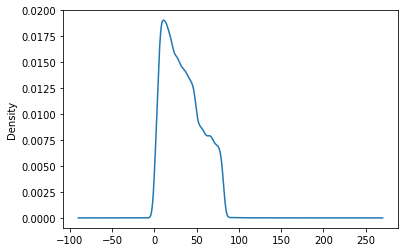

In [7]:
loan_df['Months_Since_Deliquency'].plot(kind = 'density')

In [8]:
loan_df['Months_Since_Deliquency_zero'] = loan_df['Months_Since_Deliquency'].fillna(0.0)

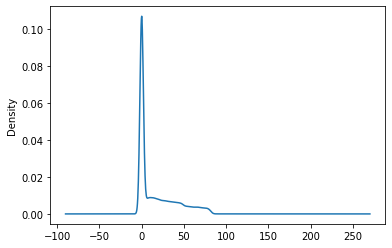

In [9]:
loan_df['Months_Since_Deliquency_zero'].plot(kind = 'density')

In [10]:
loan_df['Months_Since_Deliquency'].describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.90,0.95])

count    75930.000000
mean        34.229356
std         21.761180
min          0.000000
5%           5.000000
25%         16.000000
35%         21.000000
50%         31.000000
75%         50.000000
90%         68.000000
95%         74.000000
max        180.000000
Name: Months_Since_Deliquency, dtype: float64

In [11]:
##Observation for loan_df['Months_Since_Deliquency']
    #1.Value is distributed
    #2.Imputing it with mean or median could add bias
    #3.Strategy to impute values is generating randon numbers between 25 and 75 percentile of existing values
import math
import random
def imputeRandomValue(x):
    if math.isnan(x):
        return float(random.randint(10,60))
    else:
        return x

In [12]:
loan_df['Months_Since_Deliquency_rand1'] = loan_df['Months_Since_Deliquency'].apply(lambda x : imputeRandomValue(x))

In [13]:
loan_df['Months_Since_Deliquency_rand2'] = loan_df['Months_Since_Deliquency'].apply(lambda x : imputeRandomValue(x))

In [14]:
loan_df['Months_Since_Deliquency_rand3'] = loan_df['Months_Since_Deliquency'].apply(lambda x : imputeRandomValue(x))

In [15]:
loan_df[['Months_Since_Deliquency_zero','Months_Since_Deliquency','Months_Since_Deliquency_rand1','Months_Since_Deliquency_rand2','Months_Since_Deliquency_rand3']].describe().T

,count,mean,std,min,25%,50%,75%,max
Months_Since_Deliquency_zero,164309.0,15.817971,22.584642,0.0,0.0,0.0,28.0,180.0
Months_Since_Deliquency,75930.0,34.229356,21.761180,0.0,16.0,31.0,50.0,180.0
Months_Since_Deliquency_rand1,164309.0,34.624336,18.325579,0.0,19.0,33.0,48.0,180.0
Months_Since_Deliquency_rand2,164309.0,34.672197,18.317908,0.0,19.0,34.0,48.0,180.0
Months_Since_Deliquency_rand3,164309.0,34.684795,18.302215,0.0,19.0,34.0,48.0,180.0


In [16]:
#From above we see Months_Since_Deliquency_rand1 is more closer to the actual data, so replacing main column with this value
loan_df['Months_Since_Deliquency'] = loan_df['Months_Since_Deliquency_rand1']

In [17]:
loan_df.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Months_Since_Deliquency_zero,Months_Since_Deliquency_rand1,Months_Since_Deliquency_rand2,Months_Since_Deliquency_rand3
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,56.0,9,14,Female,1,0.0,56.0,10.0,25.0
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,17.0,17.0,17.0,17.0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,54.0,12,16,Male,3,0.0,54.0,38.0,55.0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,34.0,16,22,Male,3,0.0,34.0,53.0,19.0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,30.0,19,30,Female,1,0.0,30.0,15.0,43.0
5,10000006,"4,500",2 years,Rent,30000.0,VERIFIED - income source,credit_card,10.88,1,43.0,12,15,Male,3,0.0,43.0,38.0,44.0
6,10000007,"18,075",4 years,Rent,85000.0,VERIFIED - income,debt_consolidation,5.65,0,45.0,9,12,Male,3,0.0,45.0,33.0,27.0
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2,16.0,16.0,16.0,16.0
8,10000009,"6,300",10+ years,Rent,NaN,not verified,debt_consolidation,16.12,3,18.0,8,9,Female,3,0.0,18.0,26.0,32.0
9,10000010,"30,000",10+ years,Own,163000.0,VERIFIED - income,debt_consolidation,11.13,0,26.0,24,43,Male,1,0.0,26.0,55.0,19.0


In [18]:
##Deleting the new generated irrelavant columns
loan_df.drop(columns=['Months_Since_Deliquency_rand1','Months_Since_Deliquency_rand2','Months_Since_Deliquency_rand3','Months_Since_Deliquency_zero'], axis =1, inplace=True)

#### Converting the non-numerical to numerical columns

In [19]:
loan_df.select_dtypes(include = 'object').head(22)

,Loan_Amount_Requested,Length_Employed,Home_Owner,Income_Verified,Purpose_Of_Loan,Gender
0,"7,000",< 1 year,Rent,not verified,car,Female
1,"30,000",4 years,Mortgage,VERIFIED - income,debt_consolidation,Female
2,"24,725",7 years,Mortgage,VERIFIED - income source,debt_consolidation,Male
3,"16,000",< 1 year,NaN,VERIFIED - income source,debt_consolidation,Male
4,"17,000",8 years,Own,VERIFIED - income source,debt_consolidation,Female
5,"4,500",2 years,Rent,VERIFIED - income source,credit_card,Male
6,"18,075",4 years,Rent,VERIFIED - income,debt_consolidation,Male
7,"15,000",< 1 year,Rent,VERIFIED - income,debt_consolidation,Female
8,"6,300",10+ years,Rent,not verified,debt_consolidation,Female
9,"30,000",10+ years,Own,VERIFIED - income,debt_consolidation,Male


In [20]:
loan_df['Income_Verified'].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [21]:
dummy_cols = pd.get_dummies(loan_df['Income_Verified'])

In [22]:
loan_df = pd.concat([loan_df,dummy_cols],axis=1)

In [23]:
loan_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,VERIFIED - income,VERIFIED - income source,not verified
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,56.0,9,14,Female,1,0,0,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,1,0,0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,54.0,12,16,Male,3,0,1,0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,34.0,16,22,Male,3,0,1,0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,30.0,19,30,Female,1,0,1,0


In [24]:
loan_df.drop('Income_Verified',axis =1, inplace=True)

In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 16 columns):
Loan_ID                     164309 non-null int64
Loan_Amount_Requested       164309 non-null object
Length_Employed             156938 non-null object
Home_Owner                  138960 non-null object
Annual_Income               139207 non-null float64
Purpose_Of_Loan             164309 non-null object
Debt_To_Income              164309 non-null float64
Inquiries_Last_6Mo          164309 non-null int64
Months_Since_Deliquency     164309 non-null float64
Number_Open_Accounts        164309 non-null int64
Total_Accounts              164309 non-null int64
Gender                      164309 non-null object
Interest_Rate               164309 non-null int64
VERIFIED - income           164309 non-null uint8
VERIFIED - income source    164309 non-null uint8
not verified                164309 non-null uint8
dtypes: float64(3), int64(5), object(5), uint8(3)
memory usage: 16.8+ MB


In [26]:
## Converting Gender column
gender_cols = pd.get_dummies(loan_df['Gender'])
loan_df = pd.concat([loan_df, gender_cols], axis =1)
loan_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,VERIFIED - income,VERIFIED - income source,not verified,Female,Male
0,10000001,"7,000",< 1 year,Rent,68000.0,car,18.37,0,56.0,9,14,Female,1,0,0,1,1,0
1,10000002,"30,000",4 years,Mortgage,NaN,debt_consolidation,14.93,0,17.0,12,24,Female,3,1,0,0,1,0
2,10000003,"24,725",7 years,Mortgage,75566.4,debt_consolidation,15.88,0,54.0,12,16,Male,3,0,1,0,0,1
3,10000004,"16,000",< 1 year,NaN,56160.0,debt_consolidation,14.34,3,34.0,16,22,Male,3,0,1,0,0,1
4,10000005,"17,000",8 years,Own,96000.0,debt_consolidation,22.17,1,30.0,19,30,Female,1,0,1,0,1,0


In [27]:
loan_df.drop('Gender',axis=1, inplace = True)

In [28]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 17 columns):
Loan_ID                     164309 non-null int64
Loan_Amount_Requested       164309 non-null object
Length_Employed             156938 non-null object
Home_Owner                  138960 non-null object
Annual_Income               139207 non-null float64
Purpose_Of_Loan             164309 non-null object
Debt_To_Income              164309 non-null float64
Inquiries_Last_6Mo          164309 non-null int64
Months_Since_Deliquency     164309 non-null float64
Number_Open_Accounts        164309 non-null int64
Total_Accounts              164309 non-null int64
Interest_Rate               164309 non-null int64
VERIFIED - income           164309 non-null uint8
VERIFIED - income source    164309 non-null uint8
not verified                164309 non-null uint8
Female                      164309 non-null uint8
Male                        164309 non-null uint8
dtypes: float64(3), int64(5),

In [29]:
##Converting Loan_Amount_requested
loan_df['Loan_Amount_Requested'] = loan_df['Loan_Amount_Requested'].apply(lambda x : int(x.replace(',','')))

In [30]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 17 columns):
Loan_ID                     164309 non-null int64
Loan_Amount_Requested       164309 non-null int64
Length_Employed             156938 non-null object
Home_Owner                  138960 non-null object
Annual_Income               139207 non-null float64
Purpose_Of_Loan             164309 non-null object
Debt_To_Income              164309 non-null float64
Inquiries_Last_6Mo          164309 non-null int64
Months_Since_Deliquency     164309 non-null float64
Number_Open_Accounts        164309 non-null int64
Total_Accounts              164309 non-null int64
Interest_Rate               164309 non-null int64
VERIFIED - income           164309 non-null uint8
VERIFIED - income source    164309 non-null uint8
not verified                164309 non-null uint8
Female                      164309 non-null uint8
Male                        164309 non-null uint8
dtypes: float64(3), int64(6), 

In [31]:
loan_df['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [32]:
dict_p = {'debt_consolidation':round(loan_df[loan_df['Purpose_Of_Loan']=='debt_consolidation'].shape[0]/loan_df.shape[0],3), 
          'credit_card':round(loan_df[loan_df['Purpose_Of_Loan']=='credit_card'].shape[0]/loan_df.shape[0],3),
         'home_improvement':round(loan_df[loan_df['Purpose_Of_Loan']=='home_improvement'].shape[0]/loan_df.shape[0],3),
         'other':round(loan_df[loan_df['Purpose_Of_Loan']=='other'].shape[0]/loan_df.shape[0],3),
         'major_purchase':round(loan_df[loan_df['Purpose_Of_Loan']=='major_purchase'].shape[0]/loan_df.shape[0],3),
         'small_business':round(loan_df[loan_df['Purpose_Of_Loan']=='small_business'].shape[0]/loan_df.shape[0],3),
         'car':round(loan_df[loan_df['Purpose_Of_Loan']=='car'].shape[0]/loan_df.shape[0],3),
         'medical':round(loan_df[loan_df['Purpose_Of_Loan']=='medical'].shape[0]/loan_df.shape[0],3),
         'moving':round(loan_df[loan_df['Purpose_Of_Loan']=='moving'].shape[0]/loan_df.shape[0],3),
         'vacation':round(loan_df[loan_df['Purpose_Of_Loan']=='vacation'].shape[0]/loan_df.shape[0],3),
         'wedding':round(loan_df[loan_df['Purpose_Of_Loan']=='wedding'].shape[0]/loan_df.shape[0],3),
         'house':round(loan_df[loan_df['Purpose_Of_Loan']=='house'].shape[0]/loan_df.shape[0],3),
         'renewable_energy':round(loan_df[loan_df['Purpose_Of_Loan']=='renewable_energy'].shape[0]/loan_df.shape[0],3),
         'educational':round(loan_df[loan_df['Purpose_Of_Loan']=='educational'].shape[0]/loan_df.shape[0],3)}

In [33]:
dict_p

{'debt_consolidation': 0.591,
 'credit_card': 0.223,
 'home_improvement': 0.056,
 'other': 0.051,
 'major_purchase': 0.021,
 'small_business': 0.015,
 'car': 0.011,
 'medical': 0.009,
 'moving': 0.006,
 'vacation': 0.005,
 'wedding': 0.005,
 'house': 0.005,
 'renewable_energy': 0.001,
 'educational': 0.001}

In [34]:
loan_df['Purpose_Of_Loan_mod'] = loan_df['Purpose_Of_Loan'].apply(lambda x : dict_p.get(x))

In [35]:
loan_df.drop('Purpose_Of_Loan', axis =1, inplace = True)

In [36]:
loan_df['Length_Employed'].value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [37]:
dict_LE = {"10+ years":10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,
           '1 year':1,'< 1 year':0}

In [38]:
loan_df['Length_Employed'] = loan_df['Length_Employed'].apply(lambda x : dict_LE.get(x)) 

In [39]:
loan_df.head(10)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,VERIFIED - income,VERIFIED - income source,not verified,Female,Male,Purpose_Of_Loan_mod
0,10000001,7000,0.0,Rent,68000.0,18.37,0,56.0,9,14,1,0,0,1,1,0,0.011
1,10000002,30000,4.0,Mortgage,NaN,14.93,0,17.0,12,24,3,1,0,0,1,0,0.591
2,10000003,24725,7.0,Mortgage,75566.4,15.88,0,54.0,12,16,3,0,1,0,0,1,0.591
3,10000004,16000,0.0,NaN,56160.0,14.34,3,34.0,16,22,3,0,1,0,0,1,0.591
4,10000005,17000,8.0,Own,96000.0,22.17,1,30.0,19,30,1,0,1,0,1,0,0.591
5,10000006,4500,2.0,Rent,30000.0,10.88,1,43.0,12,15,3,0,1,0,0,1,0.223
6,10000007,18075,4.0,Rent,85000.0,5.65,0,45.0,9,12,3,1,0,0,0,1,0.591
7,10000008,15000,0.0,Rent,115000.0,7.97,1,16.0,25,31,2,1,0,0,1,0,0.591
8,10000009,6300,10.0,Rent,NaN,16.12,3,18.0,8,9,3,0,0,1,1,0,0.591
9,10000010,30000,10.0,Own,163000.0,11.13,0,26.0,24,43,1,1,0,0,0,1,0.591


In [40]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 17 columns):
Loan_ID                     164309 non-null int64
Loan_Amount_Requested       164309 non-null int64
Length_Employed             156938 non-null float64
Home_Owner                  138960 non-null object
Annual_Income               139207 non-null float64
Debt_To_Income              164309 non-null float64
Inquiries_Last_6Mo          164309 non-null int64
Months_Since_Deliquency     164309 non-null float64
Number_Open_Accounts        164309 non-null int64
Total_Accounts              164309 non-null int64
Interest_Rate               164309 non-null int64
VERIFIED - income           164309 non-null uint8
VERIFIED - income source    164309 non-null uint8
not verified                164309 non-null uint8
Female                      164309 non-null uint8
Male                        164309 non-null uint8
Purpose_Of_Loan_mod         164309 non-null float64
dtypes: float64(5), int64(6)

In [41]:
loan_df['Length_Employed'].value_counts()

10.0    52915
2.0     14620
3.0     12974
0.0     12805
5.0     10814
1.0     10422
4.0      9784
7.0      9308
6.0      9094
8.0      7917
9.0      6285
Name: Length_Employed, dtype: int64

In [42]:
def encode_Home_Owner(x):
    if 'Mortgage' in x:
        return 1
    elif 'Rent' in x:
        return 2
    elif 'Own' in x:
        return 3
    elif 'Other' in x:
        return 4
    else:
        return 5

In [43]:
loan_df['Home_Owner'] = loan_df['Home_Owner'].dropna().apply(lambda x : encode_Home_Owner(x) if(np.all(pd.notnull(x[1]))) else x)

In [44]:
loan_df.head(20)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,VERIFIED - income,VERIFIED - income source,not verified,Female,Male,Purpose_Of_Loan_mod
0,10000001,7000,0.0,2.0,68000.0,18.37,0,56.0,9,14,1,0,0,1,1,0,0.011
1,10000002,30000,4.0,1.0,NaN,14.93,0,17.0,12,24,3,1,0,0,1,0,0.591
2,10000003,24725,7.0,1.0,75566.4,15.88,0,54.0,12,16,3,0,1,0,0,1,0.591
3,10000004,16000,0.0,NaN,56160.0,14.34,3,34.0,16,22,3,0,1,0,0,1,0.591
4,10000005,17000,8.0,3.0,96000.0,22.17,1,30.0,19,30,1,0,1,0,1,0,0.591
5,10000006,4500,2.0,2.0,30000.0,10.88,1,43.0,12,15,3,0,1,0,0,1,0.223
6,10000007,18075,4.0,2.0,85000.0,5.65,0,45.0,9,12,3,1,0,0,0,1,0.591
7,10000008,15000,0.0,2.0,115000.0,7.97,1,16.0,25,31,2,1,0,0,1,0,0.591
8,10000009,6300,10.0,2.0,NaN,16.12,3,18.0,8,9,3,0,0,1,1,0,0.591
9,10000010,30000,10.0,3.0,163000.0,11.13,0,26.0,24,43,1,1,0,0,0,1,0.591


In [45]:
loan_df['Home_Owner'] = loan_df['Home_Owner'].fillna(0.0)

In [46]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 17 columns):
Loan_ID                     164309 non-null int64
Loan_Amount_Requested       164309 non-null int64
Length_Employed             156938 non-null float64
Home_Owner                  164309 non-null float64
Annual_Income               139207 non-null float64
Debt_To_Income              164309 non-null float64
Inquiries_Last_6Mo          164309 non-null int64
Months_Since_Deliquency     164309 non-null float64
Number_Open_Accounts        164309 non-null int64
Total_Accounts              164309 non-null int64
Interest_Rate               164309 non-null int64
VERIFIED - income           164309 non-null uint8
VERIFIED - income source    164309 non-null uint8
not verified                164309 non-null uint8
Female                      164309 non-null uint8
Male                        164309 non-null uint8
Purpose_Of_Loan_mod         164309 non-null float64
dtypes: float64(6), int64(6

In [47]:
corr = loan_df.corr()

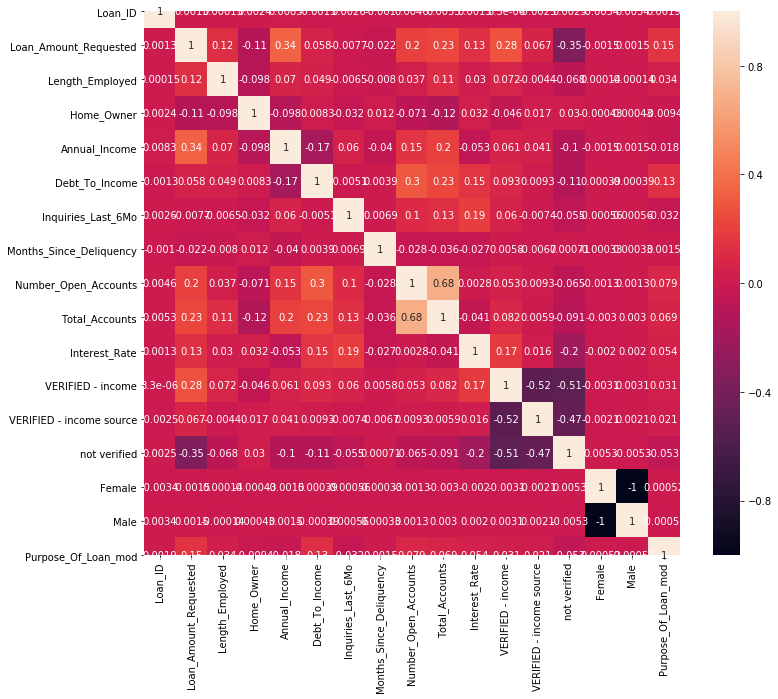

In [48]:
import seaborn as sns
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr, ax=ax,annot = True)

In [49]:
## Since we did not find significant correlation of Length_Employed,
loan_df['Length_Employed'].isnull().sum()
print(loan_df['Length_Employed'].isnull().sum()/loan_df.shape[0])

0.04486059801958505


In [50]:
##We can delete these rows as the percent of null rows is just 4% and we did not find any correlation
loan_df = loan_df[loan_df['Length_Employed'].isnull() == False]

In [51]:
loan_df.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income               23978
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency         0
Number_Open_Accounts            0
Total_Accounts                  0
Interest_Rate                   0
VERIFIED - income               0
VERIFIED - income source        0
not verified                    0
Female                          0
Male                            0
Purpose_Of_Loan_mod             0
dtype: int64

In [52]:
##Inputing AnnualIncome
loan_df['Annual_Income'].describe().apply(lambda x: format(x, 'f'))

count     132960.000000
mean       74450.427814
std        61195.655603
min         4000.000000
25%        45731.000000
50%        64500.000000
75%        90000.000000
max      7500000.000000
Name: Annual_Income, dtype: object

In [53]:
loan_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,VERIFIED - income,VERIFIED - income source,not verified,Female,Male,Purpose_Of_Loan_mod
0,10000001,7000,0.0,2.0,68000.0,18.37,0,56.0,9,14,1,0,0,1,1,0,0.011
1,10000002,30000,4.0,1.0,NaN,14.93,0,17.0,12,24,3,1,0,0,1,0,0.591
2,10000003,24725,7.0,1.0,75566.4,15.88,0,54.0,12,16,3,0,1,0,0,1,0.591
3,10000004,16000,0.0,0.0,56160.0,14.34,3,34.0,16,22,3,0,1,0,0,1,0.591
4,10000005,17000,8.0,3.0,96000.0,22.17,1,30.0,19,30,1,0,1,0,1,0,0.591


In [54]:
loan_df['Annual_Income'] = loan_df['Annual_Income'].apply(lambda x: 64500.0 if math.isnan(x) == True else x)

In [55]:
X = loan_df.loc[:,loan_df.columns!='Interest_Rate']
Y = loan_df.loc[: , loan_df.columns =='Interest_Rate']

In [56]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size =0.2)

In [57]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125550 entries, 51332 to 100593
Data columns (total 16 columns):
Loan_ID                     125550 non-null int64
Loan_Amount_Requested       125550 non-null int64
Length_Employed             125550 non-null float64
Home_Owner                  125550 non-null float64
Annual_Income               125550 non-null float64
Debt_To_Income              125550 non-null float64
Inquiries_Last_6Mo          125550 non-null int64
Months_Since_Deliquency     125550 non-null float64
Number_Open_Accounts        125550 non-null int64
Total_Accounts              125550 non-null int64
VERIFIED - income           125550 non-null uint8
VERIFIED - income source    125550 non-null uint8
not verified                125550 non-null uint8
Female                      125550 non-null uint8
Male                        125550 non-null uint8
Purpose_Of_Loan_mod         125550 non-null float64
dtypes: float64(6), int64(5), uint8(5)
memory usage: 12.1 MB


In [58]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_X.loc[:,train_X.columns!='Loan_ID'], train_Y)

C:\Users\anuran.chowdhury\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [59]:
pred_y = rf.predict(test_X.loc[:,train_X.columns!='Loan_ID'])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(test_Y,pred_y)

0.5166624187587613

In [96]:
test_df = pd.read_csv('test_fjtUOL8.csv')

In [97]:
test_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [98]:
test_col  = pd.get_dummies(test_df['Income_Verified'])
test_df = pd.concat([test_df,test_col],axis=1)
test_df.drop(columns = 'Income_Verified', axis=1, inplace=True)

In [99]:
gender_cols = pd.get_dummies(test_df['Gender'])
test_df = pd.concat([test_df, gender_cols], axis =1)
test_df.drop(columns = 'Gender',axis=1, inplace =True)

In [100]:
test_df['Loan_Amount_Requested'] = test_df['Loan_Amount_Requested'].apply(lambda x : int(x.replace(',','')))

In [101]:
dict_p = {'debt_consolidation':round(test_df[test_df['Purpose_Of_Loan']=='debt_consolidation'].shape[0]/test_df.shape[0],3), 
          'credit_card':round(test_df[test_df['Purpose_Of_Loan']=='credit_card'].shape[0]/test_df.shape[0],3),
         'home_improvement':round(test_df[test_df['Purpose_Of_Loan']=='home_improvement'].shape[0]/test_df.shape[0],3),
         'other':round(test_df[test_df['Purpose_Of_Loan']=='other'].shape[0]/test_df.shape[0],3),
         'major_purchase':round(test_df[test_df['Purpose_Of_Loan']=='major_purchase'].shape[0]/test_df.shape[0],3),
         'small_business':round(test_df[test_df['Purpose_Of_Loan']=='small_business'].shape[0]/test_df.shape[0],3),
         'car':round(test_df[test_df['Purpose_Of_Loan']=='car'].shape[0]/test_df.shape[0],3),
         'medical':round(test_df[test_df['Purpose_Of_Loan']=='medical'].shape[0]/test_df.shape[0],3),
         'moving':round(test_df[test_df['Purpose_Of_Loan']=='moving'].shape[0]/test_df.shape[0],3),
         'vacation':round(test_df[test_df['Purpose_Of_Loan']=='vacation'].shape[0]/test_df.shape[0],3),
         'wedding':round(test_df[test_df['Purpose_Of_Loan']=='wedding'].shape[0]/test_df.shape[0],3),
         'house':round(test_df[test_df['Purpose_Of_Loan']=='house'].shape[0]/test_df.shape[0],3),
         'renewable_energy':round(test_df[test_df['Purpose_Of_Loan']=='renewable_energy'].shape[0]/test_df.shape[0],3),
         'educational':round(test_df[test_df['Purpose_Of_Loan']=='educational'].shape[0]/test_df.shape[0],3)}

In [102]:
test_df['Purpose_Of_Loan_mod'] = test_df['Purpose_Of_Loan'].apply(lambda x : dict_p.get(x))
test_df.drop(columns=['Purpose_Of_Loan'], axis=1, inplace=True)

In [103]:
dict_LE = {"10+ years":10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,
           '1 year':1,'< 1 year':0}

In [104]:
test_df['Length_Employed'] = test_df['Length_Employed'].apply(lambda x : dict_LE.get(x))

In [105]:
def encode_Home_Owner(x):
    if 'Mortgage' in x:
        return 1
    elif 'Rent' in x:
        return 2
    elif 'Own' in x:
        return 3
    elif 'Other' in x:
        return 4
    else:
        return 5

In [106]:
test_df['Home_Owner'] = test_df['Home_Owner'].dropna().apply(lambda x : encode_Home_Owner(x) if(np.all(pd.notnull(x[1]))) else x)

In [107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109541 entries, 0 to 109540
Data columns (total 16 columns):
Loan_ID                     109541 non-null int64
Loan_Amount_Requested       109541 non-null int64
Length_Employed             104605 non-null float64
Home_Owner                  92830 non-null float64
Annual_Income               92643 non-null float64
Debt_To_Income              109541 non-null float64
Inquiries_Last_6Mo          109541 non-null int64
Months_Since_Deliquency     50682 non-null float64
Number_Open_Accounts        109541 non-null int64
Total_Accounts              109541 non-null int64
VERIFIED - income           109541 non-null uint8
VERIFIED - income source    109541 non-null uint8
not verified                109541 non-null uint8
Female                      109541 non-null uint8
Male                        109541 non-null uint8
Purpose_Of_Loan_mod         109541 non-null float64
dtypes: float64(6), int64(5), uint8(5)
memory usage: 9.7 MB


In [108]:
test_df.fillna(method='bfill',inplace=True)

In [109]:
pred_y_test = rf.predict(test_df.loc[:,test_df.columns!='Loan_ID'])

In [112]:
type(pred_y_test)

numpy.ndarray

In [125]:
df_submit = pd.concat([test_df[['Loan_ID']],pd.DataFrame(pred_y_test,columns=['Interest_Rate'])], axis =1)

In [127]:
df_submit.to_csv(r'C:\Users\anuran.chowdhury\Documents\Data\Personal\Documents\Data Scientist\UpGrad\Hackathon\Analytic_Vidhya\JantaHack-Banking\submission.csv', index = False)

In [129]:
from sklearn.metrics import f1_score
f1_score(test_Y,pred_y,average='micro')

0.5166624187587613

#### Hyperparameter tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'max_depth': [10,50,100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [10,50,100],
 'min_samples_split': [10, 50, 100],
 'n_estimators': [200,  1000, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X.loc[:,train_X.columns!='Loan_ID'], train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
